In [9]:
# Boston Housing Price Prediction - EDA & Modeling

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2. Load Dataset
df = pd.read_csv("/content/drive/MyDrive/boston.csv")   # make sure your CSV is in data/ folder
df.head()


,csvbase_row_id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# 3. Basic Info
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape: (506, 15)

Missing values:
 csvbase_row_id    0
CRIM              0
ZN                0
INDUS             0
CHAS              0
NOX               0
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
MEDV              0
dtype: int64


,csvbase_row_id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


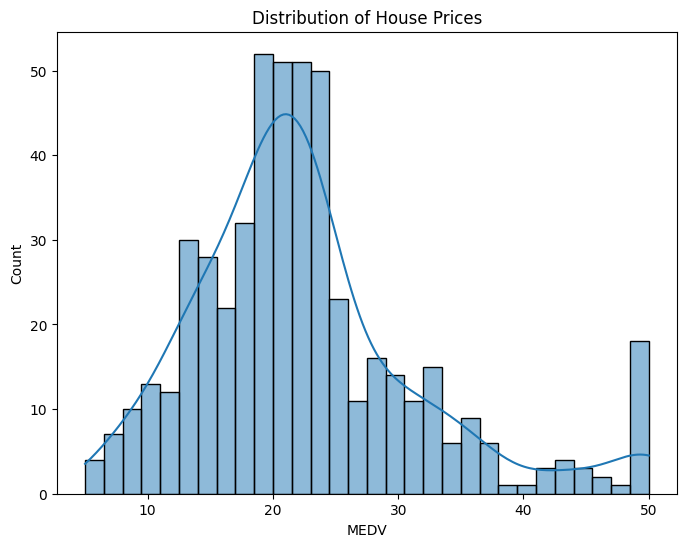

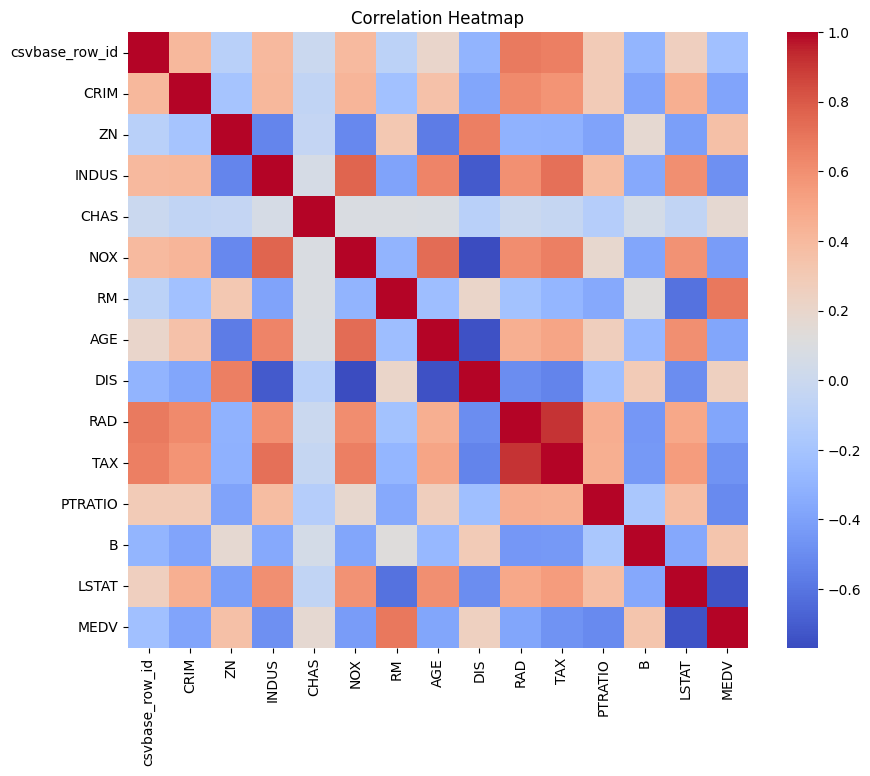

In [11]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


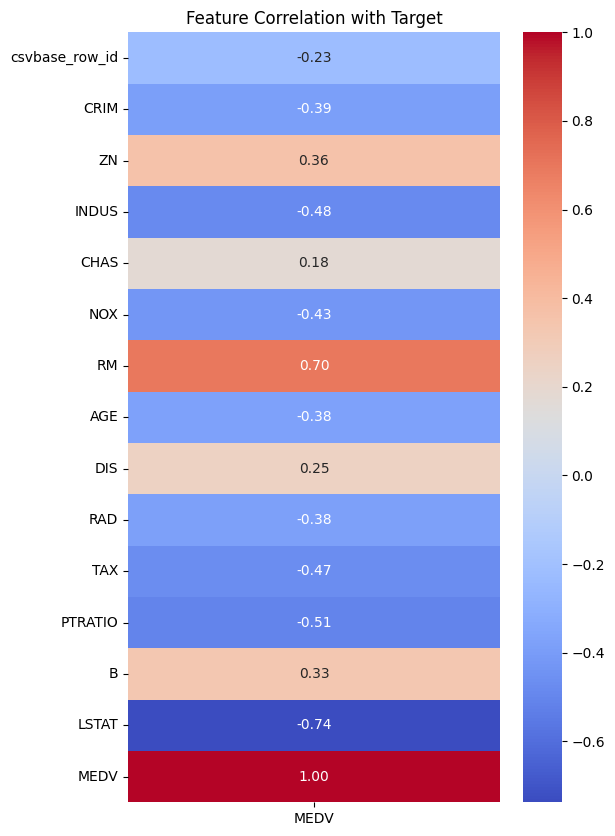

In [12]:
corr_with_target = df.corr()[['MEDV']]


plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_with_target,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True

)
plt.title("Feature Correlation with Target")
plt.show()


In [13]:
# 5. Train-Test Split
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 6. Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, round(r2, 3), round(rmse, 3)])

results_df = pd.DataFrame(results, columns=["Model", "R² Score", "RMSE"])
results_df


,Model,R² Score,RMSE
0,Linear Regression,0.666,4.950
1,Random Forest,0.886,2.891
2,XGBoost,0.928,2.299


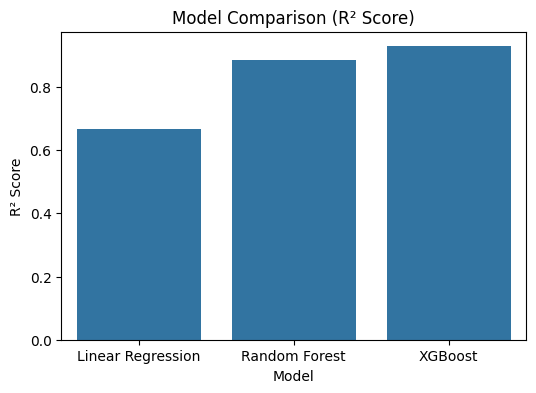

In [15]:
# 7. Visualize Model Performance
plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x="Model", y="R² Score")
plt.title("Model Comparison (R² Score)")
plt.show()


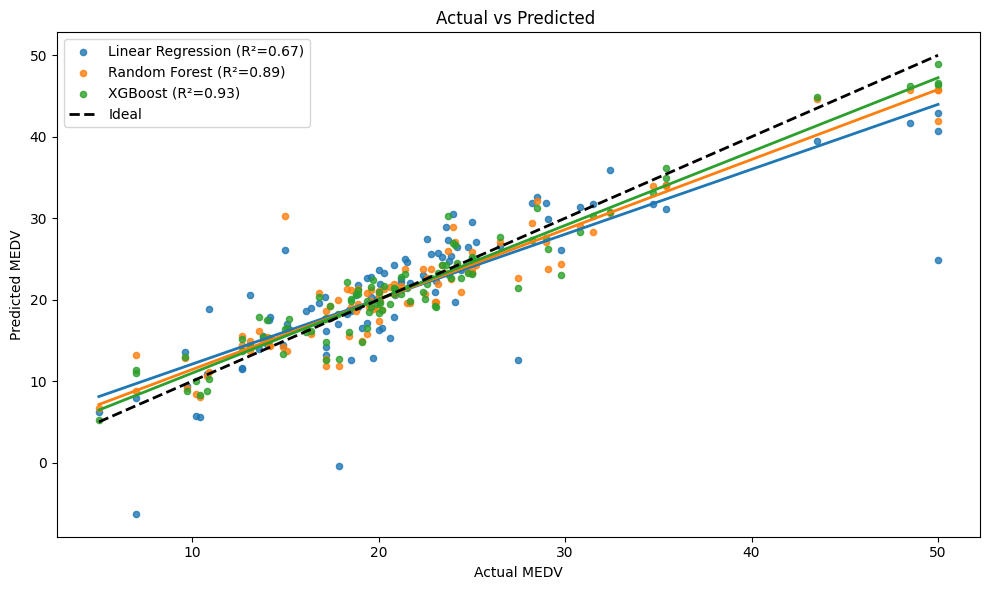

In [20]:
# Comparison of All Models with Best Fit Line (with R² Score)
plt.figure(figsize=(10,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    sns.regplot(
        x=y_test, y=y_pred, label=f"{name} (R²={r2:.2f})",
        ci=None, scatter_kws={'s':20}, line_kws={'lw':2}
    )

# Ideal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted ")
plt.legend()
plt.tight_layout()
plt.show()

